In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
file=pd.ExcelFile('/Users/harshdixit/Documents/projects/P1/Statistic_original.xlsx')

In [4]:
df=pd.read_excel(file,'TCS.NS')

In [5]:
df.head()

,Unnamed: 0,TCS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Wipro,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Infosys,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Date,Open,High,Low,Close,Adj Close,Volume,NaN,Open,High,...,Close,Adj Close,Volume,NaN,Open,High,Low,Close,Adj Close,Volume
1,2018-01-01 00:00:00,1341.150024,1629.525024,1310.099976,1556.175049,1393.173706,58090866,NaN,233.625061,250.500061,...,493.274994,440.316193,80530910,NaN,8.135,9.355,8.01,9.005,7.883518,335756000
2,2018-02-01 00:00:00,1562,1595,1446.25,1517.525024,1361.793701,46273616,NaN,228.787552,231.825058,...,470.149994,420.507019,71069814,NaN,9.045,9.045,8.44,8.83,7.730313,218224000
3,2018-03-01 00:00:00,1524.5,1563.5,1390.775024,1424.574951,1278.382324,145325896,NaN,219.600052,226.500061,...,484.299988,433.162842,72839620,NaN,8.855,9.27,8.685,8.925,7.813482,196813800
4,2018-04-01 00:00:00,1420,1780,1420,1766.050049,1584.814453,116302252,NaN,212.625046,225.750061,...,526.375,470.795258,84260254,NaN,8.895,9.11,8.245,8.835,7.734691,355883200


In [6]:
df=df.set_index('Unnamed: 0',drop='True')

In [7]:
#divide dataframe into different pieces
df_tcs=df.iloc[:,0:6]
df_wipro=df.iloc[:,7:13]
df_hcl=df.iloc[:,14:20]
df_infy=df.iloc[:,21:27]

In [8]:
#update column names and drop oth column
df_tcs.columns=['Open','High','Low','Close','Adj Close','Volume']
df_tcs=df_tcs.drop('Date',axis=0)
df_wipro.columns=['Open','High','Low','Close','Adj Close','Volume']
df_wipro=df_wipro.drop('Date',axis=0)
df_hcl.columns=['Open','High','Low','Close','Adj Close','Volume']
df_hcl=df_hcl.drop('Date',axis=0)
df_infy.columns=['Open','High','Low','Close','Adj Close','Volume']
df_infy=df_infy.drop('Date',axis=0)

In [9]:
#change index column name from unnamed:0 to Date
df_tcs.index.names=['Date']
df_wipro.index.names=['Date']
df_hcl.index.names=['Date']
df_infy.index.names=['Date']


In [10]:
#spliting train test
n=int((len(df_tcs))*0.8)
training_tcs=list(df_tcs.Close[:n])
testing_tcs=list(df_tcs.Close[n:])
training_wipro=list(df_wipro.Close[:n])
testing_wipro=list(df_wipro.Close[n:])
training_hcl=list(df_hcl.Close[:n])
testing_hcl=list(df_hcl.Close[n:])
training_infy=list(df_infy.Close[:n])
testing_infy=list(df_infy.Close[n:])


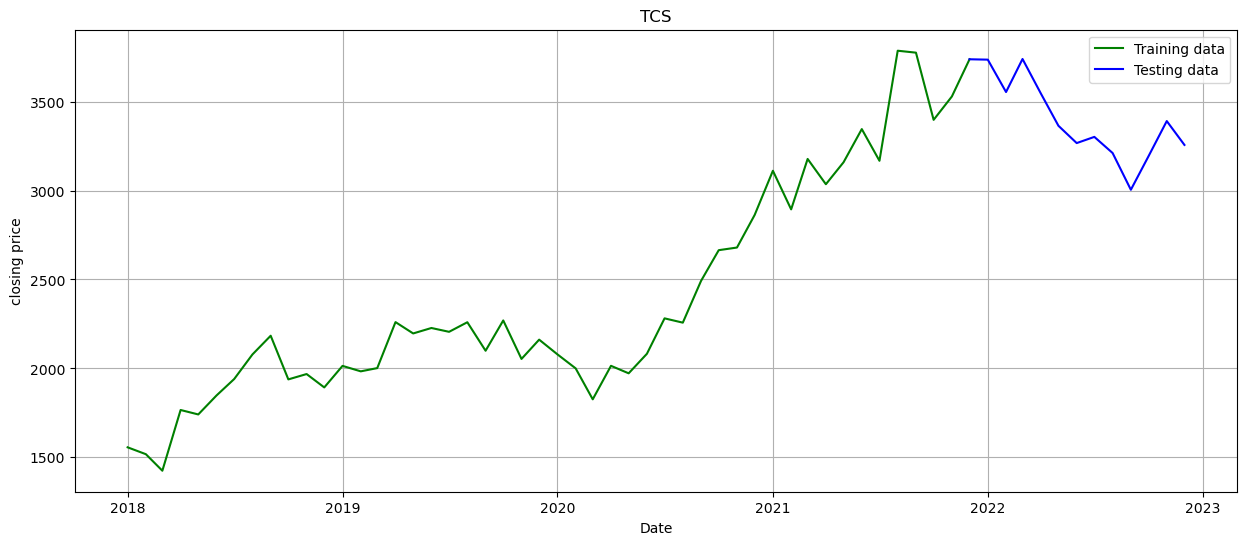

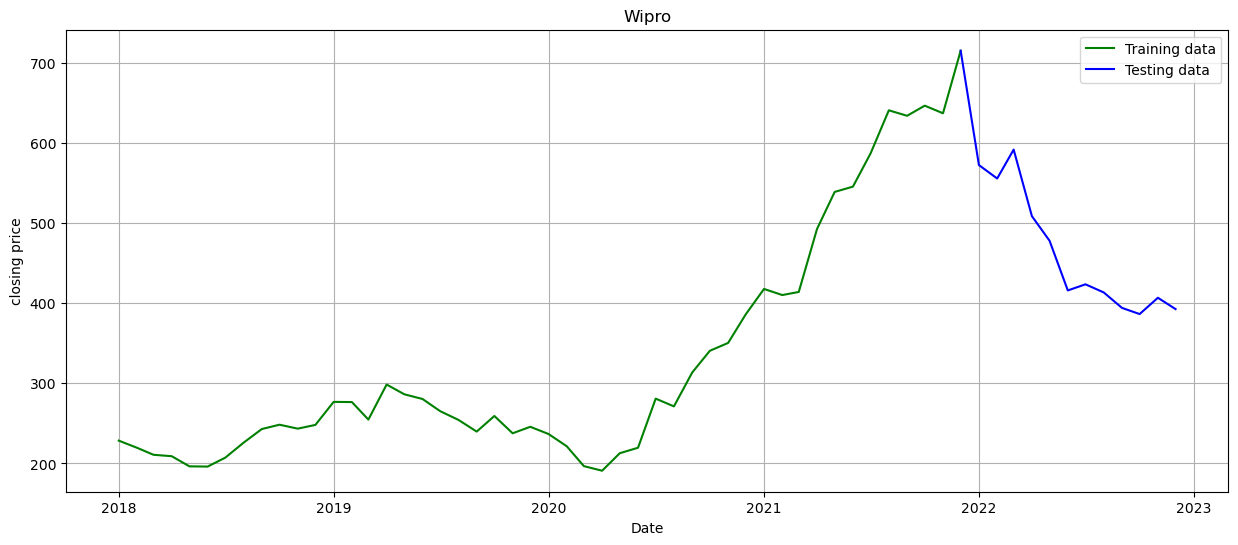

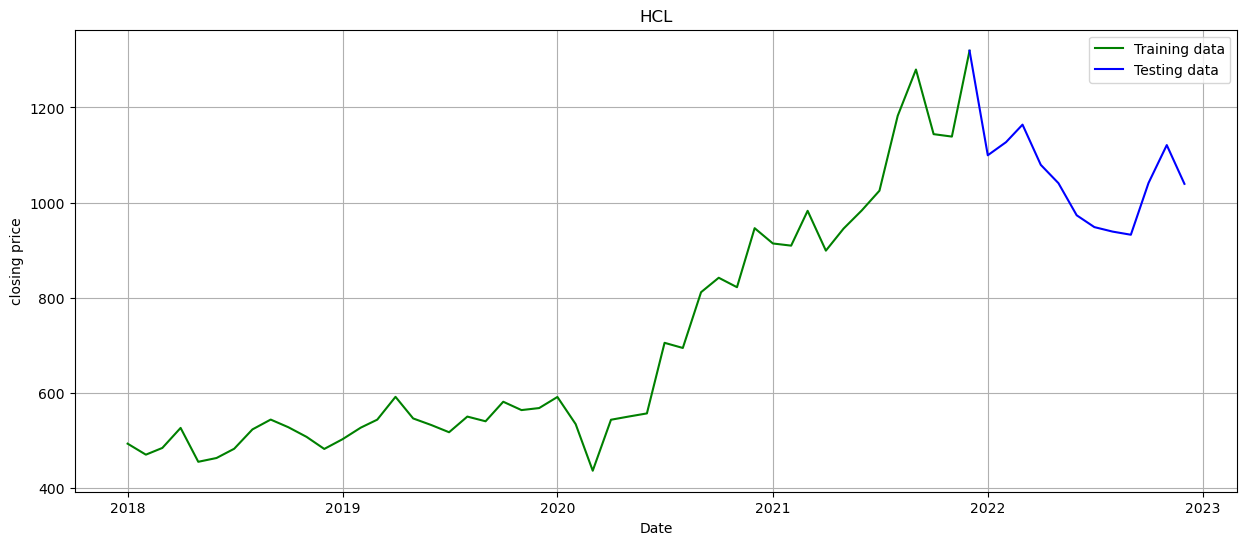

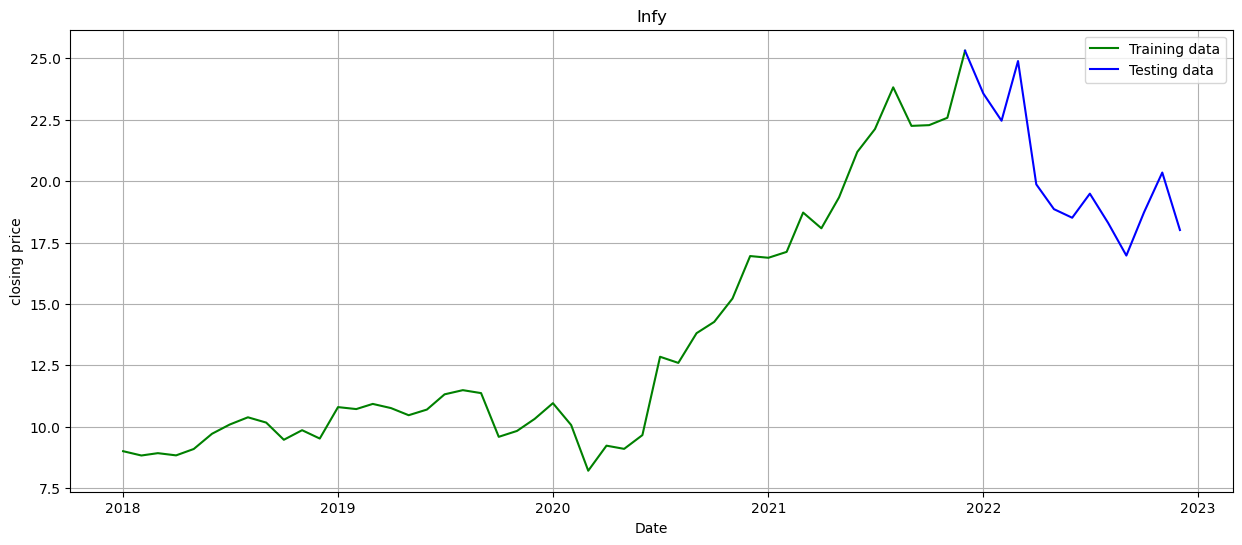

In [11]:
#TCS
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(df_tcs[:n]['Close'],'green',label='Training data')
plt.plot(df_tcs[n-1:]['Close'],'blue',label='Testing data')
plt.title('TCS')
plt.legend()
plt.show()
#WIPRO
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(df_wipro[:n]['Close'],'green',label='Training data')
plt.plot(df_wipro[n-1:]['Close'],'blue',label='Testing data')
plt.title('Wipro')
plt.legend()
plt.show()
#HCL
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(df_hcl[:n]['Close'],'green',label='Training data')
plt.plot(df_hcl[n-1:]['Close'],'blue',label='Testing data')
plt.title('HCL')
plt.legend()
plt.show()
#INFOSYS
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(df_infy[:n]['Close'],'green',label='Training data')
plt.plot(df_infy[n-1:]['Close'],'blue',label='Testing data')
plt.title('Infy')
plt.legend()
plt.show()

# ARIMA

## To Find Parameters p,q,d

In [12]:
#check for value of p (which must be <0.05)
#if p>0.05 change d 
result=adfuller(training_tcs)
print("adf Statistics: ",result[0])
print("p-value for tcs",result[1])


result=adfuller(training_wipro)
print("adf Statistics: ",result[0])
print("p-value for wipro",result[1])


result=adfuller(training_hcl)
print("adf Statistics: ",result[0])
print("p-value for hcl",result[1])



result=adfuller(training_infy)
print("adf Statistics: ",result[0])
print("p-value for infy",result[1])

adf Statistics:  0.1977645576856201
p-value for tcs 0.9721359357152136
adf Statistics:  2.4474225476687947
p-value for wipro 0.9990309077908706
adf Statistics:  1.784111541228866
p-value for hcl 0.9983169787619067
adf Statistics:  1.393924905349794
p-value for infy 0.997086368232861


In [13]:
#p>0.05
#choose d using acf and pacf
#to get value of d use pmdarima.arima.utils ndiffs
from pmdarima.arima.utils import ndiffs
print(ndiffs(training_tcs,test="adf"))
print(ndiffs(training_wipro,test="adf"))
print(ndiffs(training_hcl,test="adf"))
print(ndiffs(training_infy,test="adf"))

2
2
1
1


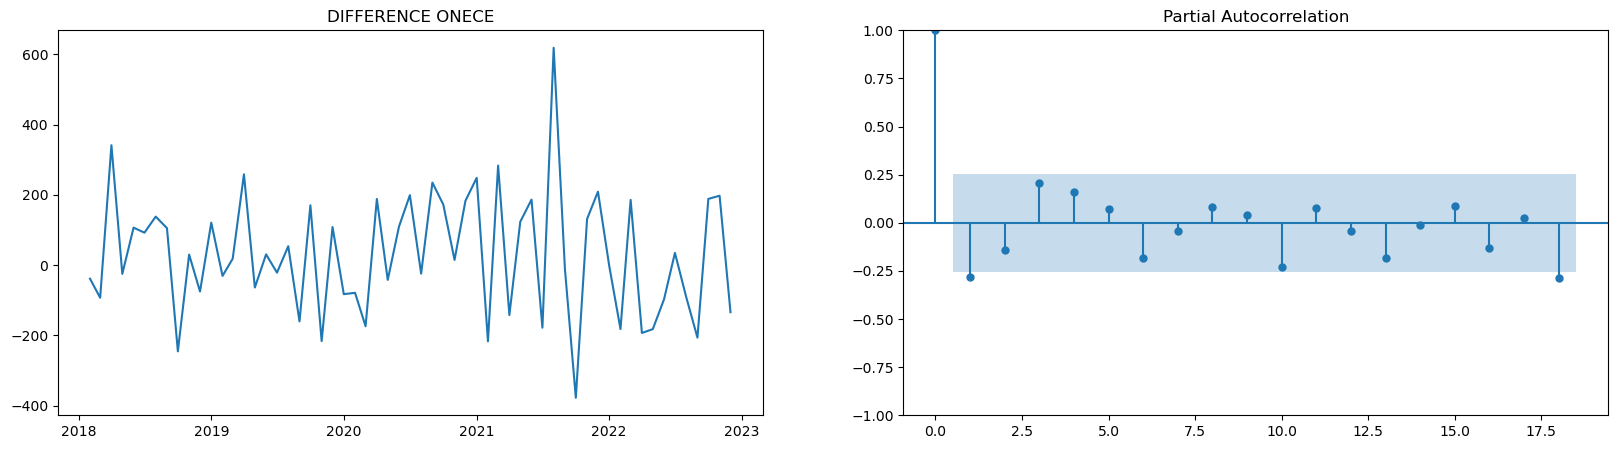

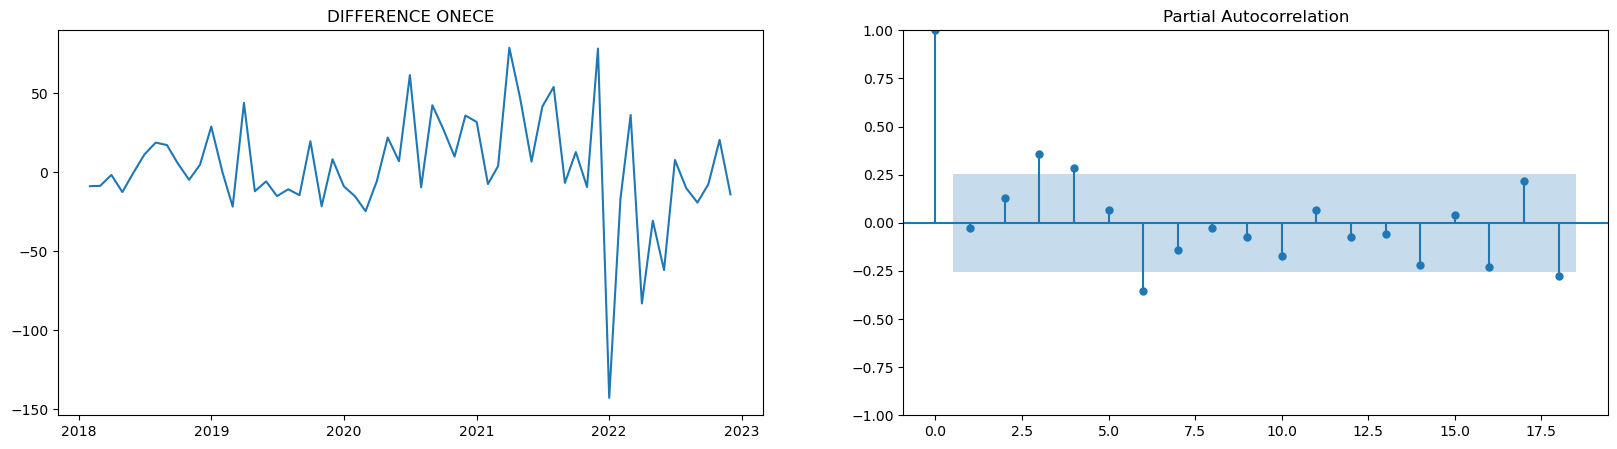

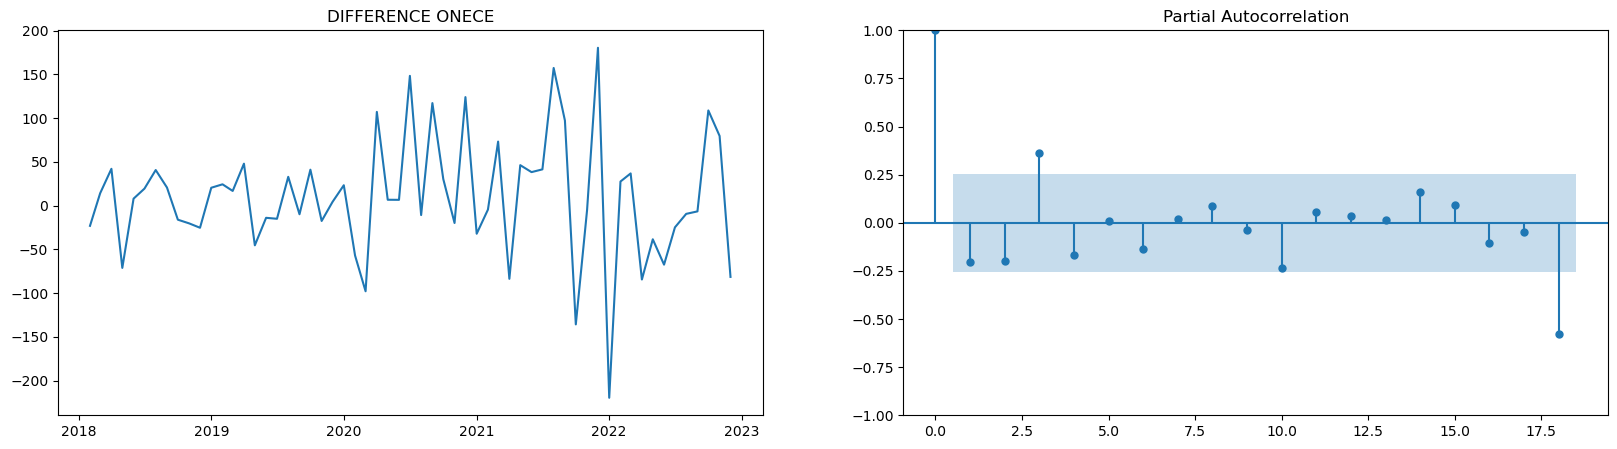

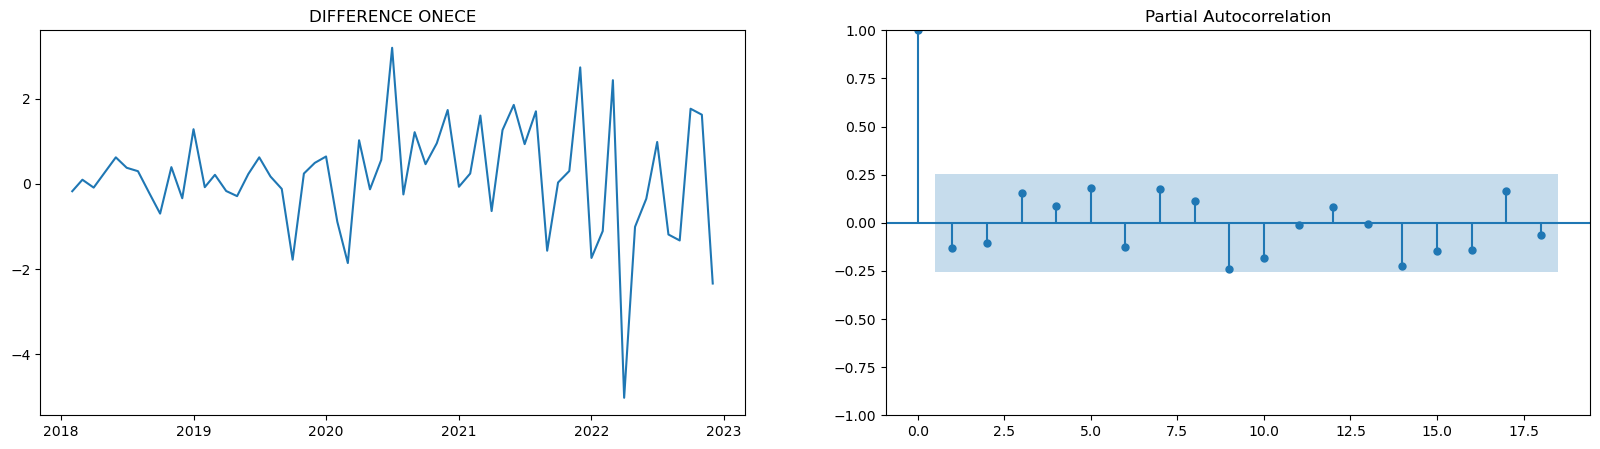

In [14]:
#choosing the value p using pacf plot pacf represents correlation between series and its lags
diff=df_tcs['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);


diff=df_wipro['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);



diff=df_hcl['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);


diff=df_infy['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

## from partial autocorrelation
### p=1 for tcs 
### p=3 for wipro
### p=3 for Hcl
### p=0 for infy

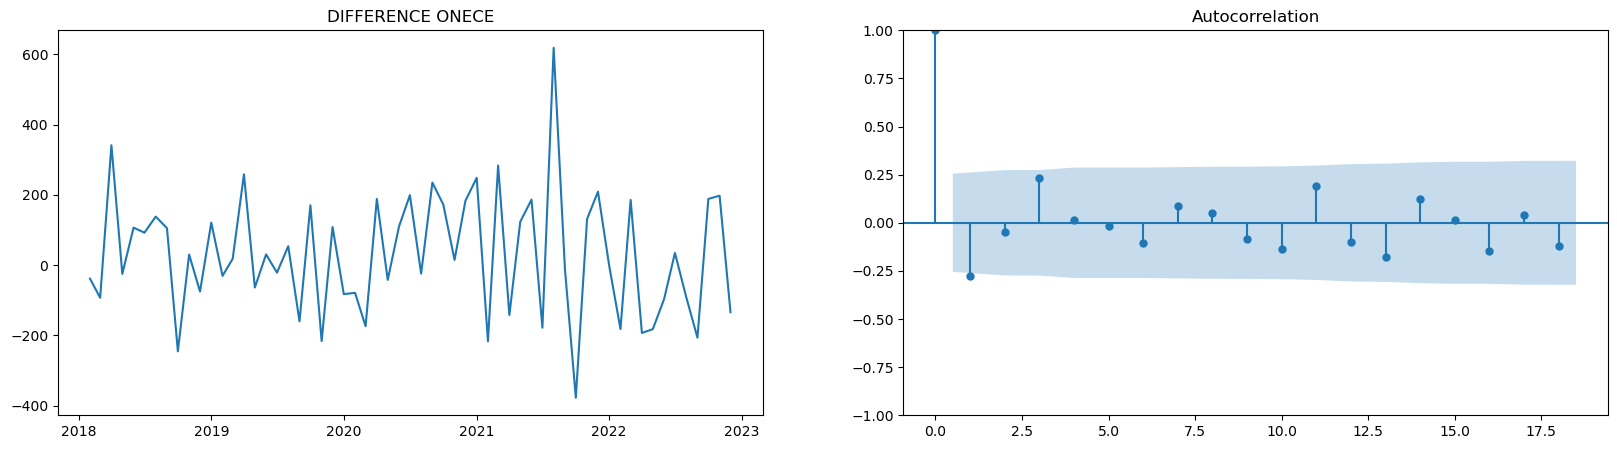

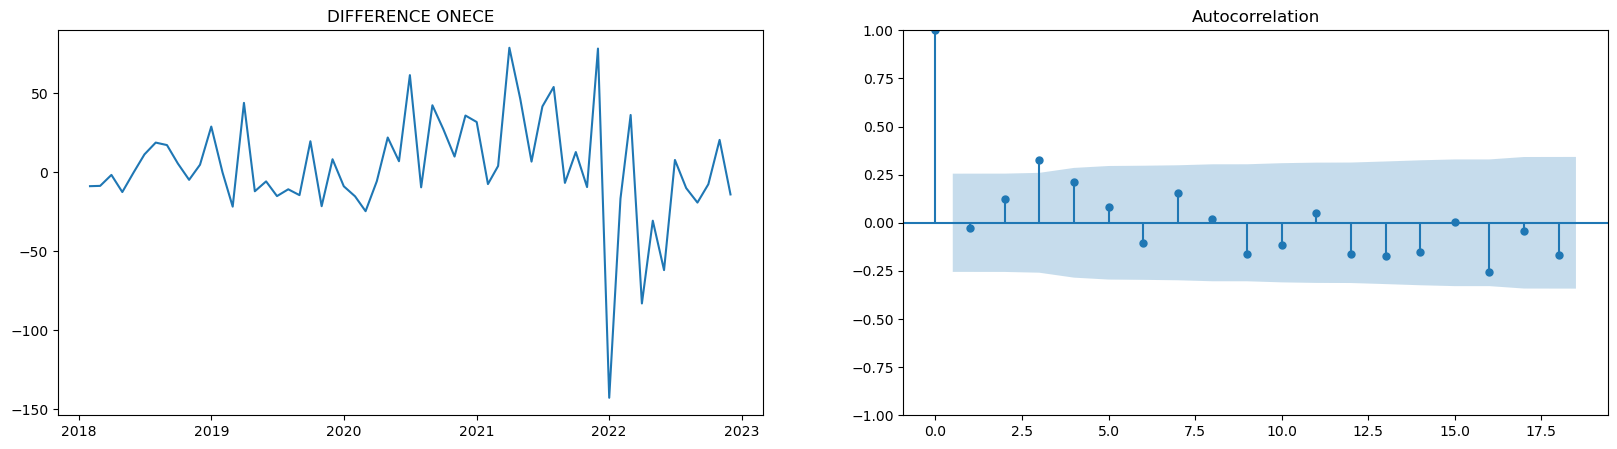

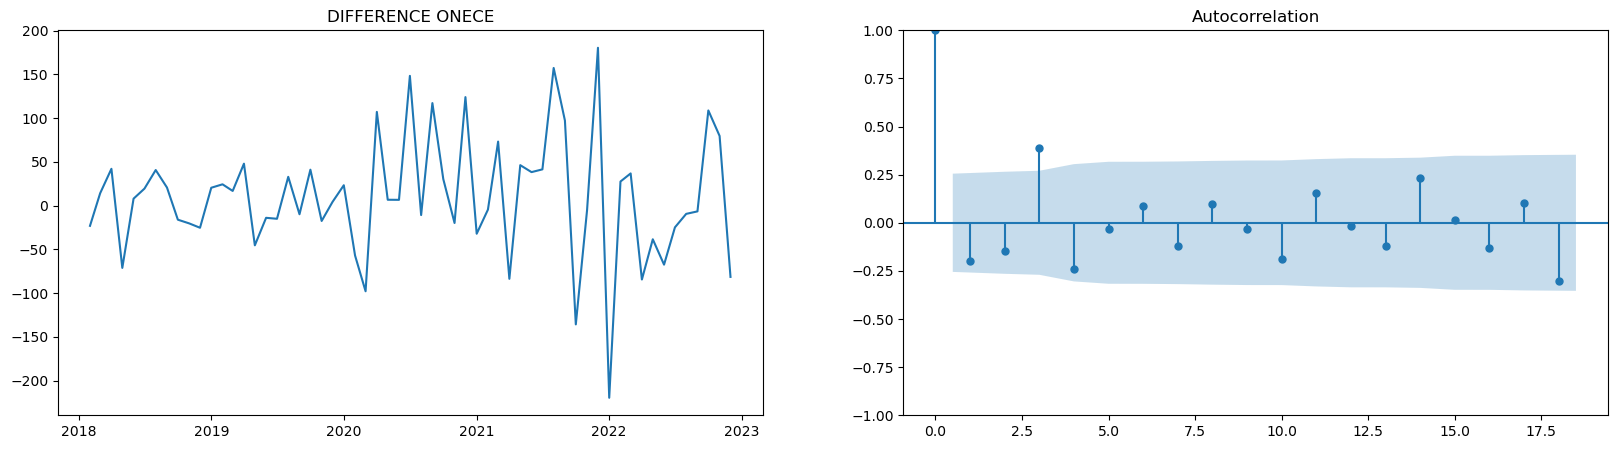

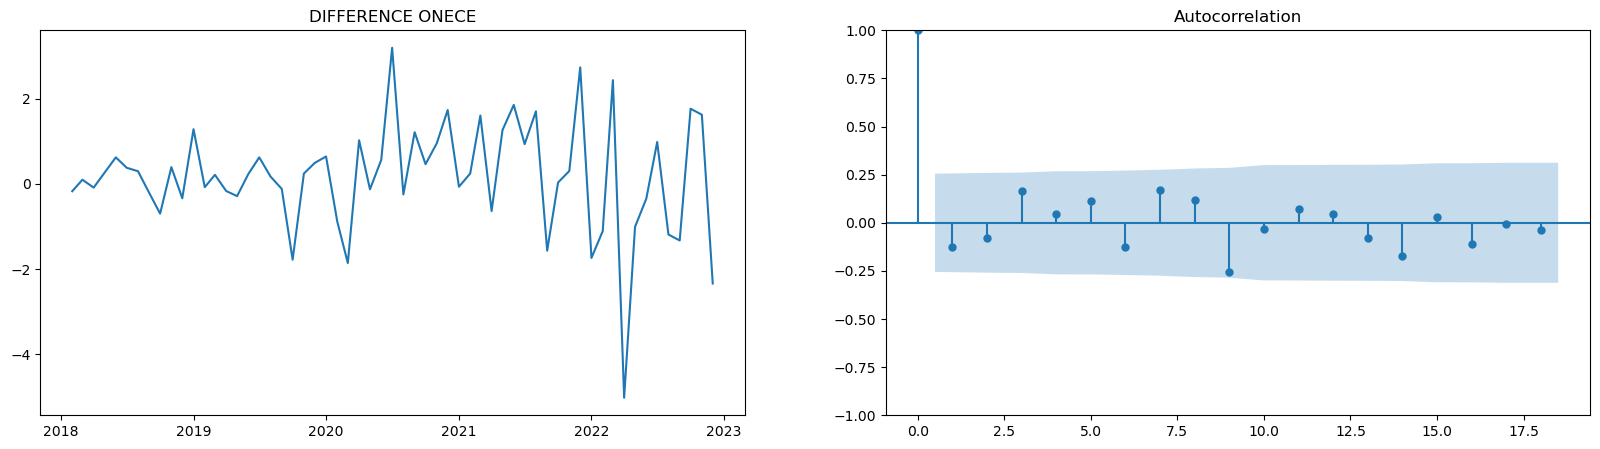

In [15]:
diff=df_tcs['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);


diff=df_wipro['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);


diff=df_hcl['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);


diff=df_infy['Close'].diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title("DIFFERENCE ONECE")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

## from autocorrelation 
### q=3 for tcs
### q=4 for wipro
### q=4 for hcl
### q=9 for infy

In [16]:
model_predictions_tcs=[]
model_predictions_wipro=[]
model_predictions_hcl=[]
model_predictions_infy=[]
n_test_obser=len(testing_tcs)

#model for tcs
actual_test_value=[]
for i in range(n_test_obser):
    model=ARIMA(training_tcs,order=(1,2,3))
    model_fit_tcs=model.fit()
    output=model_fit_tcs.forecast()
    yhat=list(output)[0]
    model_predictions_tcs.append(yhat)
    actual_test_value=testing_tcs[i]
    training_tcs.append(actual_test_value)
    
      
#model for wipro
actual_test_value=[]
for i in range(n_test_obser):
    model=ARIMA(training_wipro,order=(3,2,4))
    model_fit_wipro=model.fit()
    output=model_fit_wipro.forecast()
    yhat=list(output)[0]
    model_predictions_wipro.append(yhat)
    actual_test_value=testing_wipro[i]
    training_wipro.append(actual_test_value)
    
    
#model for hcl
actual_test_value=[]
for i in range(n_test_obser):
    model=ARIMA(training_hcl,order=(3,2,4))
    model_fit_hcl=model.fit()
    output=model_fit_hcl.forecast()
    yhat=list(output)[0]
    model_predictions_hcl.append(yhat)
    actual_test_value=testing_hcl[i]
    training_hcl.append(actual_test_value)
    
    
#model for infy
actual_test_value=[]
for i in range(n_test_obser):
    model=ARIMA(training_infy,order=(0,2,3))
    model_fit_infy=model.fit()
    output=model_fit_infy.forecast()
    yhat=list(output)[0]
    model_predictions_infy.append(yhat)
    actual_test_value=testing_infy[i]
    training_infy.append(actual_test_value)

In [17]:
print(model_fit_tcs.summary())
print(model_fit_wipro.summary())
print(model_fit_hcl.summary())
print(model_fit_infy.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -375.534
Date:                Tue, 04 Jul 2023   AIC                            761.068
Time:                        16:30:06   BIC                            771.283
Sample:                             0   HQIC                           765.038
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9046      0.128     -7.059      0.000      -1.156      -0.653
ma.L1         -0.2344      2.228     -0.105      0.916      -4.600       4.132
ma.L2         -0.8693      2.744     -0.317      0.7

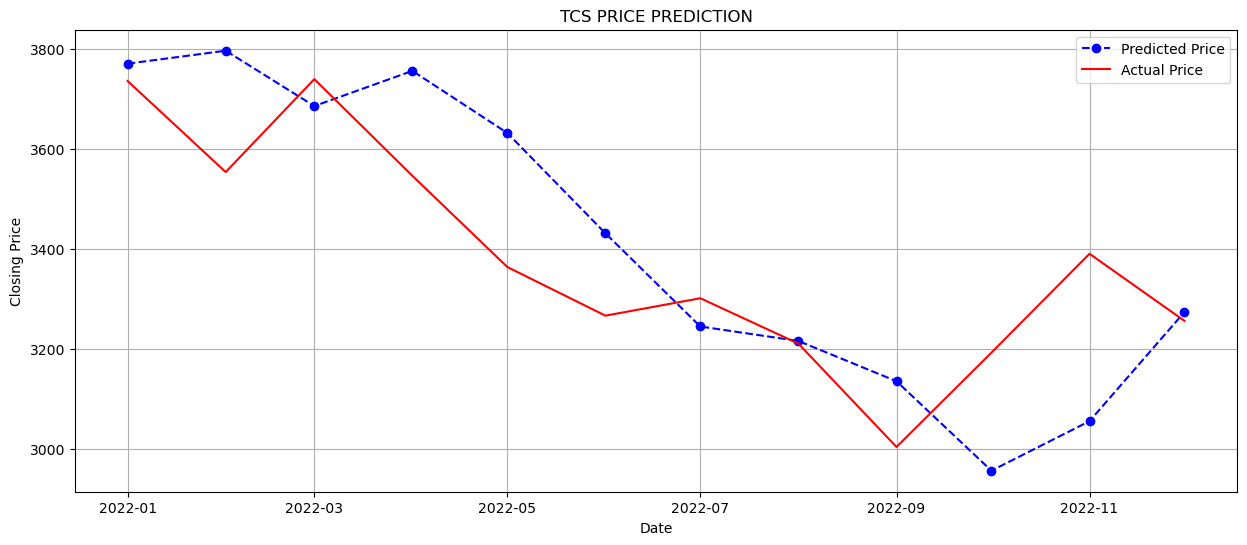

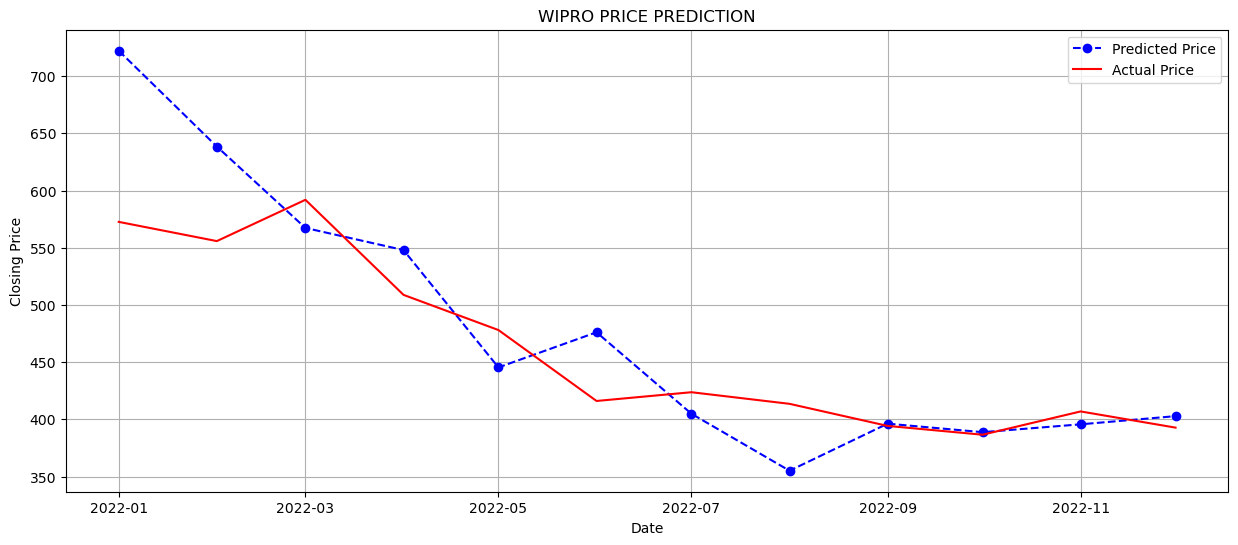

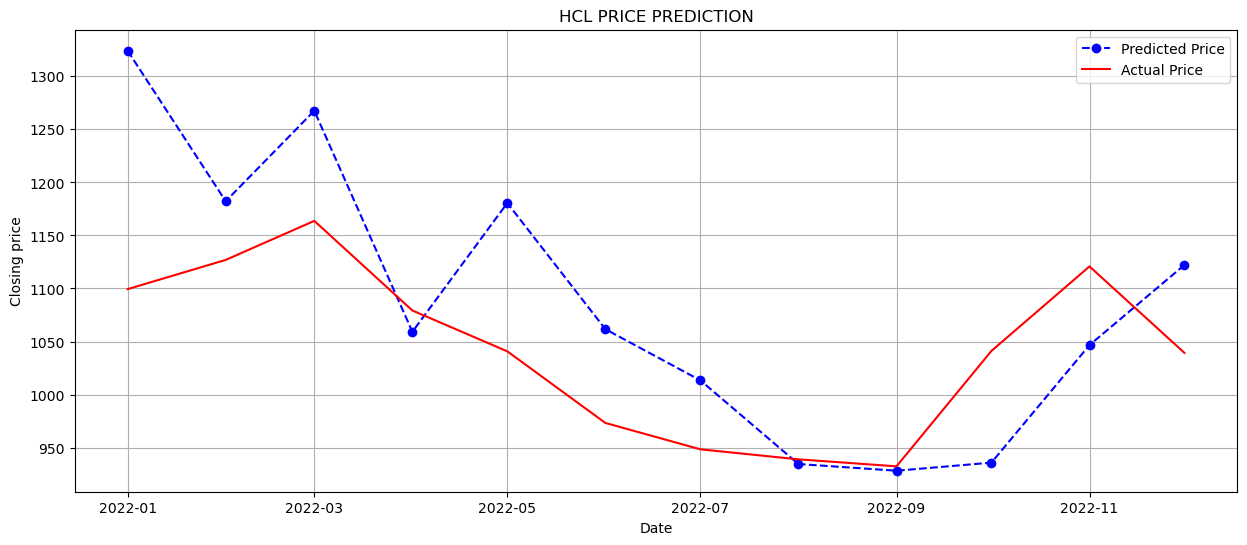

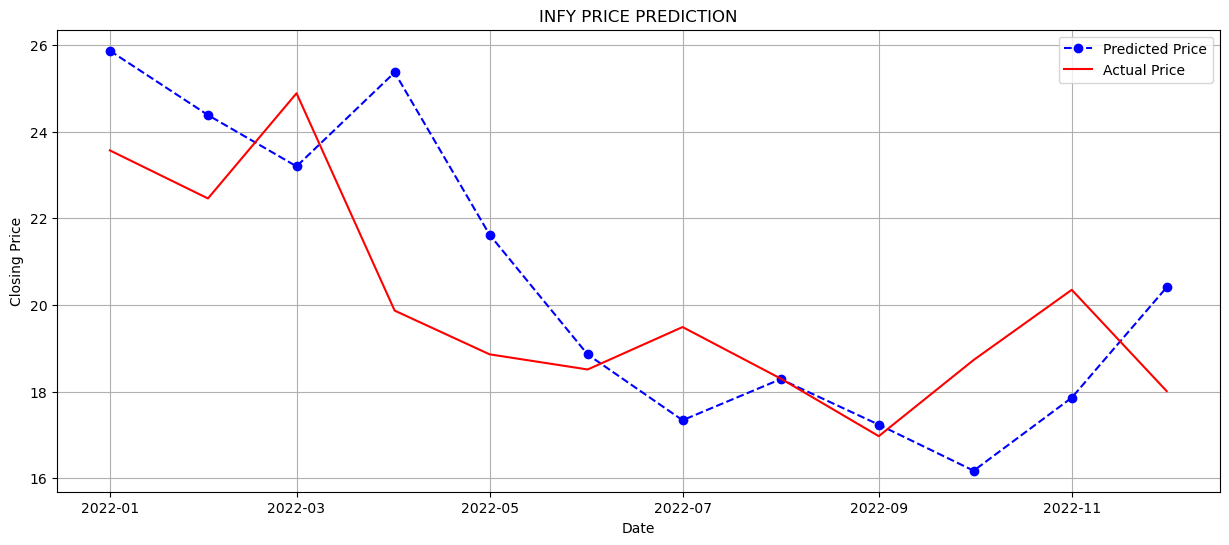

In [18]:
plt.figure(figsize=(15,6))
plt.grid(True)
date=list(df_tcs[n:].index)
plt.plot(date,model_predictions_tcs[:],'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date,testing_tcs,color='red',label='Actual Price')
plt.title('TCS PRICE PREDICTION')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



plt.figure(figsize=(15,6))
plt.grid(True)
plt.plot(date,model_predictions_wipro[:],'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date,testing_wipro,color='red',label='Actual Price')
plt.title('WIPRO PRICE PREDICTION')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



plt.figure(figsize=(15,6))
plt.grid(True)
date=list(df_tcs[n:].index)
plt.plot(date,model_predictions_hcl[:],'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date,testing_hcl,color='red',label='Actual Price')
plt.title('HCL PRICE PREDICTION')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()



plt.figure(figsize=(15,6))
plt.grid(True)
plt.plot(date,model_predictions_infy[:],'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date,testing_infy,color='red',label='Actual Price')
plt.title('INFY PRICE PREDICTION')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [19]:
mape_tcs=np.mean(np.abs(np.array(model_predictions_tcs[:])-np.array(testing_tcs))/np.abs(testing_tcs))
mape_wipro=np.mean(np.abs(np.array(model_predictions_wipro[:])-np.array(testing_wipro))/np.abs(testing_wipro))
mape_hcl=np.mean(np.abs(np.array(model_predictions_hcl[:])-np.array(testing_hcl))/np.abs(testing_hcl))
mape_infy=np.mean(np.abs(np.array(model_predictions_infy[:])-np.array(testing_infy))/np.abs(testing_infy))

In [20]:
print("accuracy of TCS ARIMA model=",(100-(mape_tcs*100)),"%")
print("accuracy of WIPRO ARIMA model=",(100-(mape_wipro*100)),"%")
print("accuracy of HCL ARIMA model=",(100-(mape_hcl*100)),"%")
print("accuracy of INFY ARIMA model=",(100-(mape_infy*100)),"%")

accuracy of TCS ARIMA model= 95.65279740351217 %
accuracy of WIPRO ARIMA model= 91.74194268534967 %
accuracy of HCL ARIMA model= 92.40667297995253 %
accuracy of INFY ARIMA model= 89.8976875821833 %


# LSTM 

In [21]:
ds_tcs=df_tcs.iloc[:,3:4]
ds_tcs=ds_tcs.reset_index()['Close']

ds_wipro=df_wipro.iloc[:,3:4]
ds_wipro=ds_wipro.reset_index()['Close']

ds_hcl=df_hcl.iloc[:,3:4]
ds_hcl=ds_hcl.reset_index()['Close']

ds_infy=df_infy.iloc[:,3:4]
ds_infy=ds_infy.reset_index()['Close']

In [22]:
#scaling Data MinMax
sc=MinMaxScaler(feature_range=(0,1))


ds_tcs=sc.fit_transform(np.array(ds_tcs).reshape(-1,1))


ds_wipro=sc.fit_transform(np.array(ds_wipro).reshape(-1,1))


ds_hcl=sc.fit_transform(np.array(ds_hcl).reshape(-1,1))


ds_infy=sc.fit_transform(np.array(ds_infy).reshape(-1,1))

In [23]:
#spliting the data 80:20 
training_size=int(len(ds_tcs)*0.80)
test_size=len(ds_tcs)-training_size

train_data_tcs,test_data_tcs=ds_tcs[0:training_size,:],ds_tcs[training_size:len(ds_tcs),:1]

train_data_wipro,test_data_wipro=ds_wipro[0:training_size,:],ds_wipro[training_size:len(ds_wipro),:1]

train_data_hcl,test_data_hcl=ds_hcl[0:training_size,:],ds_hcl[training_size:len(ds_hcl),:1]

train_data_infy,test_data_infy=ds_infy[0:training_size,:],ds_infy[training_size:len(ds_infy),:1]

In [24]:
#Define a function which is used to create windows 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [25]:
# use First 3 to predict the next i.e. time_step=3
time_step=3

x_train_tcs,y_train_tcs=create_dataset(train_data_tcs,time_step)
x_test_tcs,y_test_tcs=create_dataset(test_data_tcs,time_step)

x_train_wipro,y_train_wipro=create_dataset(train_data_wipro,time_step)
x_test_wipro,y_test_wipro=create_dataset(test_data_wipro,time_step)

x_train_hcl,y_train_hcl=create_dataset(train_data_hcl,time_step)
x_test_hcl,y_test_hcl=create_dataset(test_data_hcl,time_step)

x_train_infy,y_train_infy=create_dataset(train_data_infy,time_step)
x_test_infy,y_test_infy=create_dataset(test_data_infy,time_step)

In [26]:
#change the shape of data to feed LSTM model i.e. (x,y,1)
x_train_tcs=x_train_tcs.reshape(x_train_tcs.shape[0],x_train_tcs.shape[1],1)
x_test_tcs=x_test_tcs.reshape(x_test_tcs.shape[0],x_test_tcs.shape[1],1)

x_train_wipro=x_train_wipro.reshape(x_train_wipro.shape[0],x_train_wipro.shape[1],1)
x_test_wipro=x_test_wipro.reshape(x_test_wipro.shape[0],x_test_wipro.shape[1],1)

x_train_hcl=x_train_hcl.reshape(x_train_hcl.shape[0],x_train_hcl.shape[1],1)
x_test_hcl=x_test_hcl.reshape(x_test_hcl.shape[0],x_test_hcl.shape[1],1)

x_train_infy=x_train_infy.reshape(x_train_infy.shape[0],x_train_infy.shape[1],1)
x_test_infy=x_test_infy.reshape(x_test_infy.shape[0],x_test_infy.shape[1],1)

In [27]:
#Prepare Model
algo=Sequential()
algo.add(LSTM(units=10,return_sequences=True,input_shape=(x_train_tcs.shape[1],1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units=10,return_sequences=True))
algo.add(Dropout(0.2))
algo.add(LSTM(units=10,return_sequences=True))
algo.add(Dropout(0.2))
algo.add(LSTM(units=10))
algo.add(Dropout(0.2))
algo.add(Dense(units=1))
algo.compile(optimizer='adam',loss='mean_squared_error')
algo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 10)             480       
                                                                 
 dropout (Dropout)           (None, 3, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 10)             840       
                                                                 
 dropout_1 (Dropout)         (None, 3, 10)             0         
                                                                 
 lstm_2 (LSTM)               (None, 3, 10)             840       
                                                                 
 dropout_2 (Dropout)         (None, 3, 10)             0         
                                                                 
 lstm_3 (LSTM)               (None, 10)                8

In [28]:
#train Model
algo.fit(x_train_tcs,y_train_tcs,validation_data=(x_test_tcs,y_test_tcs),epochs=100,batch_size=32,verbose=1)
#implment model on train and test data
train_predict_tcs=algo.predict(x_train_tcs)
test_predict_tcs=algo.predict(x_test_tcs)

Epoch 1/100
2/2 [==============================] - 3s 651ms/step - loss: 0.2363 - val_loss: 0.6106
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2300 - val_loss: 0.5971
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2225 - val_loss: 0.5833
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2150 - val_loss: 0.5693
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2096 - val_loss: 0.5550
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2013 - val_loss: 0.5404
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1929 - val_loss: 0.5252
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1879 - val_loss: 0.5097
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1801 - val_loss: 0.4937
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1736 - val_loss: 0.4772
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0265 - val_loss: 0.0073
Epoch 85/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0235 - val_loss: 0.0085
Epoch 86/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0154 - val_loss: 0.0104
Epoch 87/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0168 - val_loss: 0.0123
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0138 - val_loss: 0.0150
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0174 - val_loss: 0.0200
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0136 - val_loss: 0.0217
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0214 - val_loss: 0.0202
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0255 - val_loss: 0.0156
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0131 - val_loss: 0.0141
Epoch 94/1

In [29]:
algo.fit(x_train_wipro,y_train_wipro,validation_data=(x_test_wipro,y_test_wipro),epochs=100,batch_size=32,verbose=1)
train_predict_wipro=algo.predict(x_train_wipro)
test_predict_wipro=algo.predict(x_test_wipro)

Epoch 1/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0203 - val_loss: 0.0302
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0208 - val_loss: 0.0360
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0167 - val_loss: 0.0395
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0249 - val_loss: 0.0358
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0270 - val_loss: 0.0274
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0228 - val_loss: 0.0203
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0147 - val_loss: 0.0163
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0255 - val_loss: 0.0150
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0163 - val_loss: 0.0154
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0220 - val_loss: 0.0143
Epoch 11/100
2/2 [=

Epoch 84/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0106 - val_loss: 0.0728
Epoch 85/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0132 - val_loss: 0.0742
Epoch 86/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0137 - val_loss: 0.0732
Epoch 87/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0125 - val_loss: 0.0728
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0095 - val_loss: 0.0683
Epoch 89/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0077 - val_loss: 0.0627
Epoch 90/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0142 - val_loss: 0.0591
Epoch 91/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0087 - val_loss: 0.0579
Epoch 92/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0094 - val_loss: 0.0569
Epoch 93/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0567
Epoch 94/1

In [30]:
algo.fit(x_train_hcl,y_train_hcl,validation_data=(x_test_hcl,y_test_hcl),epochs=100,batch_size=32,verbose=1)
train_predict_hcl=algo.predict(x_train_hcl)
test_predict_hcl=algo.predict(x_test_hcl)

Epoch 1/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0269 - val_loss: 0.0440
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0123 - val_loss: 0.0378
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0111 - val_loss: 0.0316
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0103 - val_loss: 0.0273
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0089 - val_loss: 0.0257
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0243
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0165 - val_loss: 0.0227
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0177 - val_loss: 0.0219
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0156 - val_loss: 0.0225
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0248
Epoch 11/100
2/2 [=

Epoch 84/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.0338
Epoch 85/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0317
Epoch 86/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0167 - val_loss: 0.0282
Epoch 87/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0119 - val_loss: 0.0247
Epoch 88/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0119 - val_loss: 0.0226
Epoch 89/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0208
Epoch 90/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0133 - val_loss: 0.0194
Epoch 91/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0120 - val_loss: 0.0187
Epoch 92/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0181
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0144 - val_loss: 0.0182
Epoch 94/1

In [31]:
algo.fit(x_train_infy,y_train_infy,validation_data=(x_test_infy,y_test_infy),epochs=100,batch_size=32,verbose=1)
train_predict_infy=algo.predict(x_train_infy)
test_predict_infy=algo.predict(x_test_infy)

Epoch 1/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0090 - val_loss: 0.0297
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0104 - val_loss: 0.0282
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0121 - val_loss: 0.0278
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0115 - val_loss: 0.0287
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0082 - val_loss: 0.0309
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0140 - val_loss: 0.0330
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0088 - val_loss: 0.0347
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0085 - val_loss: 0.0358
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0123 - val_loss: 0.0369
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0092 - val_loss: 0.0378
Epoch 11/100
2/2 [=

Epoch 84/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0098 - val_loss: 0.0387
Epoch 85/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0072 - val_loss: 0.0393
Epoch 86/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0088 - val_loss: 0.0401
Epoch 87/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0104 - val_loss: 0.0410
Epoch 88/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0117 - val_loss: 0.0412
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0096 - val_loss: 0.0411
Epoch 90/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0126 - val_loss: 0.0401
Epoch 91/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 0.0390
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0121 - val_loss: 0.0375
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0114 - val_loss: 0.0361
Epoch 94/1

In [32]:
y_train_tcs=sc.inverse_transform(y_train_tcs.reshape(y_train_tcs.shape[0],1))
y_test_tcs=sc.inverse_transform(y_test_tcs.reshape(y_test_tcs.shape[0],1))

y_train_wipro=sc.inverse_transform(y_train_wipro.reshape(y_train_wipro.shape[0],1))
y_test_wipro=sc.inverse_transform(y_test_wipro.reshape(y_test_wipro.shape[0],1))

y_train_hcl=sc.inverse_transform(y_train_hcl.reshape(y_train_hcl.shape[0],1))
y_test_hcl=sc.inverse_transform(y_test_hcl.reshape(y_test_hcl.shape[0],1))

y_train_infy=sc.inverse_transform(y_train_infy.reshape(y_train_infy.shape[0],1))
y_test_infy=sc.inverse_transform(y_test_infy.reshape(y_test_infy.shape[0],1))

In [33]:
train_predict_tcs=sc.inverse_transform(train_predict_tcs)
test_predict_tcs=sc.inverse_transform(test_predict_tcs)

train_predict_wipro=sc.inverse_transform(train_predict_wipro)
test_predict_wipro=sc.inverse_transform(test_predict_wipro)

train_predict_hcl=sc.inverse_transform(train_predict_hcl)
test_predict_hcl=sc.inverse_transform(test_predict_hcl)

train_predict_infy=sc.inverse_transform(train_predict_infy)
test_predict_infy=sc.inverse_transform(test_predict_infy)

In [34]:
#Calculate RMSE Values
print("RMSE ON TCS TRAIN DATA =",math.sqrt(mean_squared_error(y_train_tcs,train_predict_tcs)))
print("RMSE ON TCS TEST DATA =",math.sqrt(mean_squared_error(y_test_tcs,test_predict_tcs)))
print()
print("RMSE ON WIPRO TRAIN DATA =",math.sqrt(mean_squared_error(y_train_wipro,train_predict_wipro)))
print("RMSE ON WIPRO TEST DATA =",math.sqrt(mean_squared_error(y_test_wipro,test_predict_wipro)))
print()
print("RMSE ON HCL TRAIN DATA =",math.sqrt(mean_squared_error(y_train_hcl,train_predict_hcl)))
print("RMSE ON HCL TEST DATA =",math.sqrt(mean_squared_error(y_test_hcl,test_predict_hcl)))
print()
print("RMSE ON INFY TRAIN DATA =",math.sqrt(mean_squared_error(y_train_infy,train_predict_infy)))
print("RMSE ON INFY TEST DATA =",math.sqrt(mean_squared_error(y_test_infy,test_predict_infy)))

RMSE ON TCS TRAIN DATA = 1.4167287867105904
RMSE ON TCS TEST DATA = 2.2890665244232746

RMSE ON WIPRO TRAIN DATA = 1.151024361636641
RMSE ON WIPRO TEST DATA = 4.36192316573139

RMSE ON HCL TRAIN DATA = 1.4108903930780745
RMSE ON HCL TEST DATA = 2.4987761008744096

RMSE ON INFY TRAIN DATA = 1.2448433459141082
RMSE ON INFY TEST DATA = 3.368782416549744


In [40]:
print(train_predict_tcs.shape)
print(len(date))

(44, 1)
44


In [41]:
train_predict_tcs

array([[11.616751],
       [11.541399],
       [11.612434],
       [12.316432],
       [12.387257],
       [12.795526],
       [13.262447],
       [13.745969],
       [13.746739],
       [13.015457],
       [13.048687],
       [12.975275],
       [13.291931],
       [13.318725],
       [13.712193],
       [14.532329],
       [14.337891],
       [14.439648],
       [14.37539 ],
       [14.387273],
       [13.993235],
       [14.299603],
       [13.689022],
       [13.893771],
       [13.446939],
       [13.056926],
       [12.790019],
       [13.30759 ],
       [13.401256],
       [14.041145],
       [14.84589 ],
       [15.264054],
       [16.651371],
       [17.620705],
       [18.243681],
       [19.631868],
       [20.609938],
       [20.025934],
       [21.278502],
       [20.892712],
       [21.869246],
       [22.736143],
       [23.066687],
       [25.962387]], dtype=float32)

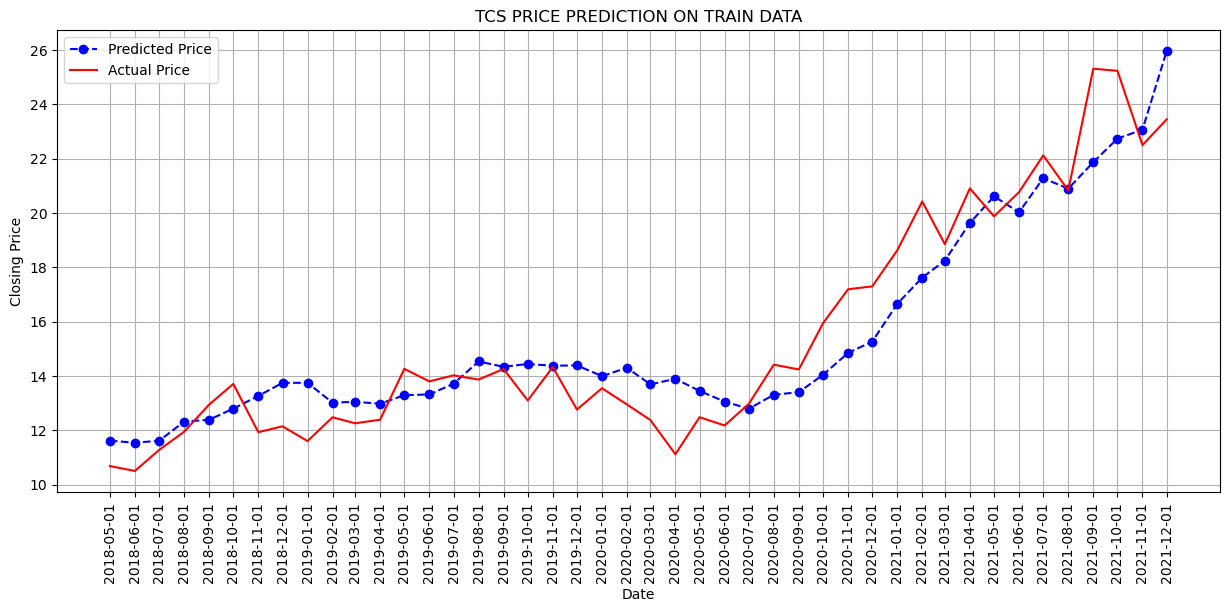

In [39]:
plt.figure(figsize=(15,6))
plt.grid(True)
date=df_tcs[4:training_size].index
date1=df_tcs[training_size+4:len(ds_tcs)].index
plt.plot(date,train_predict_tcs,'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date,y_train_tcs,color='red',label='Actual Price')
plt.title('TCS PRICE PREDICTION ON TRAIN DATA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(date,rotation=90)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
date1=df_tcs[training_size+4:len(ds_tcs)].index
plt.plot(date1,test_predict_tcs,'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date1,y_test_tcs,color='red',label='Actual Price')
plt.title('TCS PRICE PREDICTION ON TEST DATA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(date1,rotation=90)
plt.legend()
plt.show()


plt.figure(figsize=(20,6))
plt.grid(True)
date1=df_wipro[training_size+4:len(ds_wipro)].index
plt.plot(date1,test_predict_wipro,'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date1,y_test_wipro,color='red',label='Actual Price')
plt.title('Wipro PRICE PREDICTION ON TEST DATA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(date1,rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.grid(True)
date1=df_tcs[training_size+4:len(ds_tcs)].index
plt.plot(date1,test_predict_hcl,'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date1,y_test_hcl,color='red',label='Actual Price')
plt.title('HCL PRICE PREDICTION ON TEST DATA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(date1,rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.grid(True)
date1=df_tcs[training_size+4:len(ds_tcs)].index
plt.plot(date1,test_predict_infy,'blue',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(date1,y_test_infy,color='red',label='Actual Price')
plt.title('INFY PRICE PREDICTION ON TEST DATA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(date1,rotation=90)
plt.legend()
plt.show()